In [1]:
print('hello world')

hello world


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
from datetime import date
start = '2010-01-01'
end = date.today()

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
df.tail() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,185.440002,187.100006,184.619995,186.279999,186.279999,72044800
2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41260800


In [5]:
df = df.reset_index()

In [6]:
df.head() 
 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370183,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [7]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head() 

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


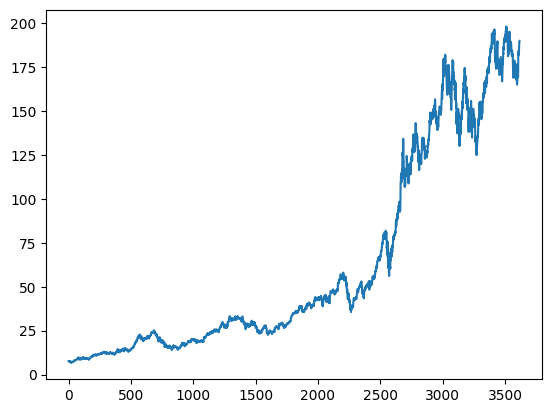

In [8]:
plt.plot(df.Close) 

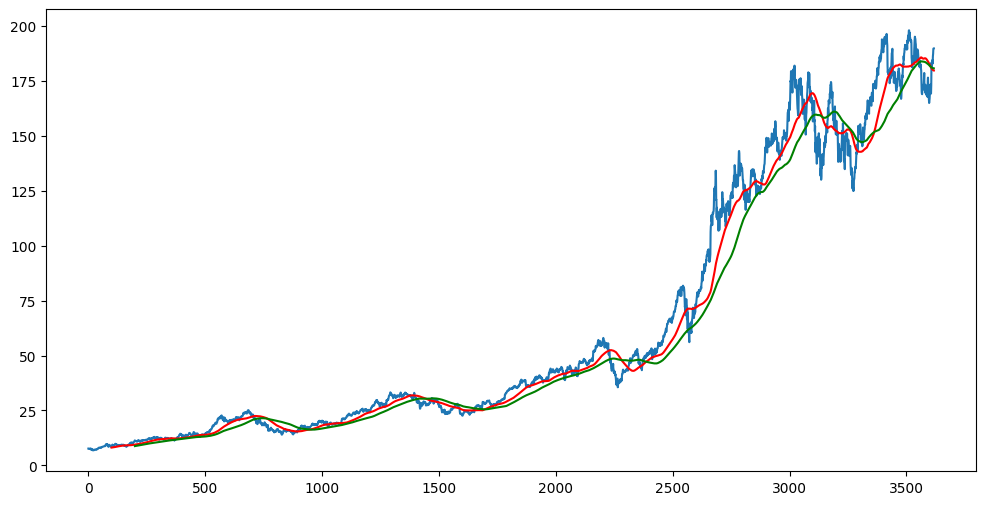

In [9]:
mean_avg_100=df.Close.rolling(100).mean()
mean_avg_200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(mean_avg_100, 'r')
plt.plot(mean_avg_200, 'g')

In [10]:
training_data = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.7):])
print(training_data.shape)
print(testing_data.shape)
 

(2532, 1)
(1086, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1)) 

In [12]:
training_data_array = scaler.fit_transform(training_data)
training_data_array

array([[0.0107512 ],
       [0.01093235],
       [0.00926288],
       ...,
       [0.99475658],
       [1.        ],
       [0.99684705]])

In [13]:
x_train = []
y_train = []

for i in range(100, training_data_array.shape[0]):
   x_train.append(training_data_array[i-100:i])
   y_train.append(training_data_array[i, 0])
   
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)

[[[0.0107512 ]
  [0.01093235]
  [0.00926288]
  ...
  [0.026785  ]
  [0.02603105]
  [0.02548761]]

 [[0.01093235]
  [0.00926288]
  [0.00907193]
  ...
  [0.02603105]
  [0.02548761]
  [0.03001134]]

 [[0.00926288]
  [0.00907193]
  [0.00975735]
  ...
  [0.02548761]
  [0.03001134]
  [0.03173958]]

 ...

 [[0.61034189]
  [0.62226809]
  [0.62134282]
  ...
  [0.98632591]
  [0.99828646]
  [0.99088398]]

 [[0.62226809]
  [0.62134282]
  [0.61092449]
  ...
  [0.99828646]
  [0.99088398]
  [0.99475658]]

 [[0.62134282]
  [0.61092449]
  [0.62288499]
  ...
  [0.99088398]
  [0.99475658]
  [1.        ]]]


In [14]:
#Machine Learning Model

from tf_keras.layers import Dense, Dropout, LSTM
from tf_keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) 


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50



KeyboardInterrupt: 

In [ ]:
model.save('keras_model.h5')

c:\Python311\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
past_100_days = training_data.tail(100)


In [ ]:
final_df = pd.concat([past_100_days, testing_data], ignore_index=True)


In [ ]:
final_df

,Close
0,51.382500
1,52.252499
2,52.185001
3,51.424999
4,52.297501
...,...
1179,181.710007
1180,182.399994
1181,182.740005
1182,184.570007


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00592935],
       [0.00546933],
       ...,
       [0.89524803],
       [0.90772014],
       [0.89736077]])

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i- 100: i])
   y_test.append(input_data[i,0])
   

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(1084, 100, 1)
(1084,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)


34/34 [==============================] - 3s 40ms/step


In [ ]:
y_predicted

array([[0.14538391],
       [0.14845936],
       [0.15141028],
       ...,
       [0.7666775 ],
       [0.7772427 ],
       [0.7885595 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00681535])

In [ ]:
scale_factor = 1/ scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


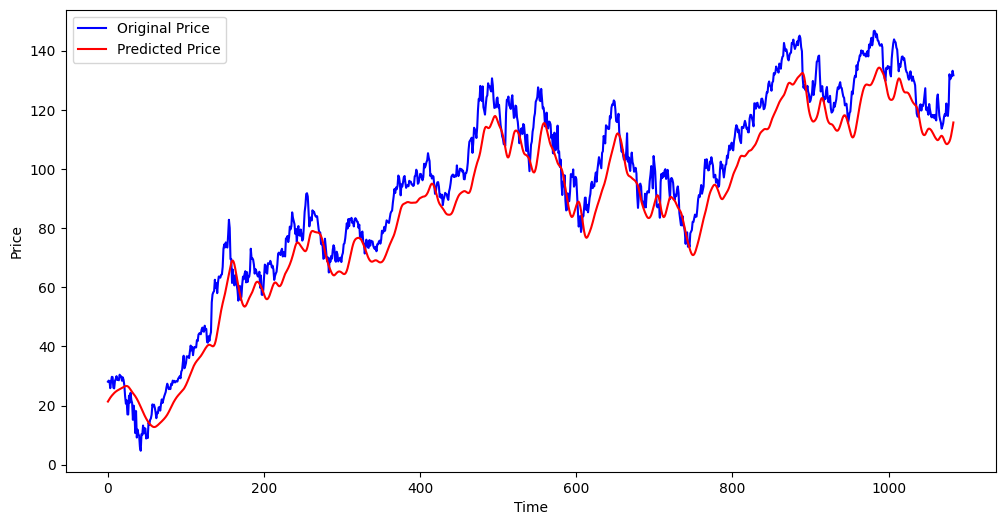

In [ ]:
plt.figure( figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [17]:
temp = yf.Ticker('AAPL')
temp.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,11,21,6,0,0
1,-1m,10,17,12,2,0
2,-2m,10,17,12,2,0
3,-3m,10,24,7,1,0


In [18]:
temp.news

[{'uuid': '49e3e831-3592-3702-93ae-bd3fe498f7b7',
  'title': 'Apple’s 27% App Store Fee Trying to Comply With Law, Exec Says',
  'publisher': 'Bloomberg',
  'link': 'https://finance.yahoo.com/news/apple-27-app-store-fee-233908737.html',
  'providerPublishTime': 1716001905,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/3tkhtAe2ZauGohzoEPMZyA--~B/aD0xMzMzO3c9MjAwMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/bloomberg_technology_68/cc041416812518da4f7fb8b33a6198fd',
     'width': 2000,
     'height': 1333,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/CBSPLOEFIY_QC7w48JWMwg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/bloomberg_technology_68/cc041416812518da4f7fb8b33a6198fd',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['AAPL']},
 {'uuid': '2c9b23b8-276a-3174-89f4-f017b4181a30',
  'title': 'Adobe comes after indie game emulator